<font size="+3" color=Green><b> <center><u>Text classification step by step</u></center></b></font>

Natural Language Processing (NLP) is a subfield of computer science, artificial intelligence, information engineering, and human-computer interaction. This field focuses on how to program computers to process and analyze large amounts of natural language data. It is difficult to perform as the process of reading and understanding languages is far more complex than it seems at first glance.

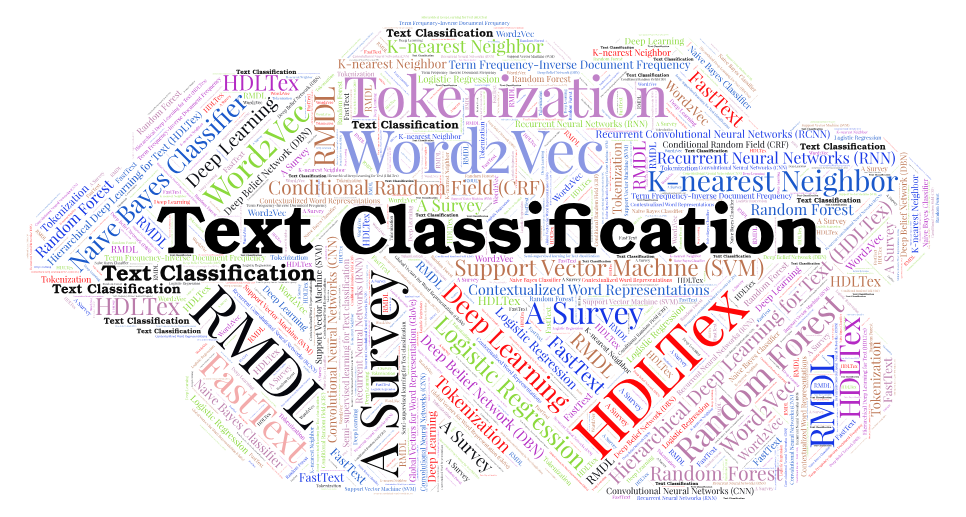

<h2 class="list-group-item list-group-item-action active"  data-toggle="list"  role="tab" aria-controls="home" > <center>Objective  </center></h2>

Goals of this kernel are the following:
- Basic Exploratory Data Analysis.
- Beginners guide to clean the dataset.
- Feature Analysis & extraction 
- Modelling and ecvaluation metrics 
- submitting the results 

<a id="top"></a>
<div class="list-group" id="list-tab" role="tablist">
<h2 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home"> <center> Table of content </center></h2>

<font color="blue" size=+1><b>Introduction</b></font>
* [About Data ](#1.1)
    
<font color="blue" size=+1><b> Load and Check Data </b></font>
* [Importing Library](#2.1)
* [Load Dataset](#2.2)

<font color="blue" size=+1><b> Exploratory Data Analysis </b></font>
* [Target variable distribution](#3.1)
* [Explaratory analysis of tweets](#3.2)    
* [Explaratory analysis of Other Variables](#3.3)   


<font color="blue" size=+1><b> Data Preparation </b></font>
    
* [Data cleaning ](#4.0)
        
* [Removing STOP words ](#4.1)
           
* [Tokonezing](#4.2)
        
* [Stemming](#4.3)
        
* [Lemmatization](#4.4)
        
* [Splitting the data](#4.5)
    
<font color="blue" size=+1><b> Feature Extraction </b></font>
* [Bag of words](#4.9)
* [Tf-idf Vectorizer](#5.0)
* [reduce the dimensionality of the Matrix](#5.1)
    
    
<font color="blue" size=+1><b> Model Training </b></font>
    
* [MultinomialNB ](#5.2)





<a id="1"></a>
<h2 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home"> <center>  Introduction  </center></h2>

<a id="1.1"></a>
<font color="blue" size=+2.5><b> About Data</b></font>
<br/>
<br/>
* **What files do I need?**

You'll need train.csv, test.csv and sample_submission.csv.

* **What should I expect the data format to be?**

Each sample in the train and test set has the following information:

1. The text of a tweet
2. A keyword from that tweet (although this may be blank!)
3. The location the tweet was sent from (may also be blank)

*** What am I predicting?**

You are predicting whether a given tweet is about a real disaster or not. If so, predict a 1. If not, predict a 0.

* **Files**

1. train.csv - the training set
2. test.csv - the test set
3. sample_submission.csv - a sample submission file in the correct format

## The columns in this dataset are:

* id - a unique identifier for each tweet
* text - the text of the tweet
* location - the location the tweet was sent from (may be blank)
* keyword - a particular keyword from the tweet (may be blank)
* target - in train.csv only, this denotes whether a tweet is about a real disaster (1) or not (0)




<a id="2"></a>
<h2 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home"> <center>  Load and Check Data  </center></h2>

<a id="2.1"></a>
<font color="blue" size=+2.5><b> Import Libraries </b></font>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import re #regex applies a regular expression to a string and returns the matching substrings. 
import matplotlib.pyplot as plt
import seaborn as sns 
import nltk 
from sklearn import feature_extraction, model_selection, naive_bayes, pipeline, manifold, preprocessing
import nltk.corpus
from nltk.corpus import stopwords
from nltk.tokenize import BlanklineTokenizer
from nltk.tokenize import TweetTokenizer
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
import string
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict
from collections import  Counter
plt.style.use('ggplot')
stop=set(stopwords.words('english'))
import re
import scikitplot as skplt
from nltk.tokenize import word_tokenize
import gensim
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tqdm import tqdm
from keras.models import Sequential
from keras.layers import Embedding,LSTM,Dense,SpatialDropout1D
from keras.initializers import Constant
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam
from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle
from multiprocessing import Pool

<a id="2.2"></a>
<font color="blue" size=+2.5><b> Import Dataset </b></font>


In [ ]:
train_data = pd.read_csv('../input/nlp-getting-started/train.csv')
test_data  = pd.read_csv('../input/nlp-getting-started/test.csv')


In [ ]:
train_data.head(10)

In [ ]:
print('There are {} rows and {} columns in train'.format(train_data.shape[0],train_data.shape[1]))
print('There are {} rows and {} columns in train'.format(test_data.shape[0],test_data.shape[1]))

In [ ]:
train_data.dtypes

In [ ]:
#Let's display one the tweets existed in the text column 
train_data['text'][11]

<a id="3"></a>
<h2 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home"> <center>  Exploratory Data Analysis </center></h2>

<a id="3.1"></a>
<font color="blue" size=+2.5><b> Target variable distribution </b></font>

Before we begin with anything else,let's check the class distribution.There are only two classes 0 and 1.

In [ ]:
x=train_data.target.value_counts()
sns.barplot(x.index,x)
plt.gca().set_ylabel('samples')

There are more tweets with class 0 ( No disaster) than class 1 ( disaster tweets)

<a id="3.2"></a>
<font color="blue" size=+2.5><b> Explaratory analysis of tweets </b></font>

First,we will do very basic analysis,that is character level,word level and sentence level analysis.

Number of characters in tweets

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
tweet_len=train_data[train_data['target']==1]['text'].str.len()
ax1.hist(tweet_len,color='blue')
ax1.set_title('disaster tweets')
tweet_len=train_data[train_data['target']==0]['text'].str.len()
ax2.hist(tweet_len,color='CRIMSON')
ax2.set_title('Not disaster tweets')
fig.suptitle('Characters in tweets')
plt.show()

The distribution of both seems to be almost same.120 t0 140 characters in a tweet are the most common among both.

**Number of words in a tweet**

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
tweet_len=train_data[train_data['target']==1]['text'].str.split().map(lambda x: len(x))
ax1.hist(tweet_len,color='blue')
ax1.set_title('disaster tweets')
tweet_len=train_data[train_data['target']==0]['text'].str.split().map(lambda x: len(x))
ax2.hist(tweet_len,color='CRIMSON')
ax2.set_title('Not disaster tweets')
fig.suptitle('Words in a tweet')
plt.show()


**Average word length in a tweet**

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
word=train_data[train_data['target']==1]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='red')
ax1.set_title('disaster')
word=train_data[train_data['target']==0]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='green')
ax2.set_title('Not disaster')
fig.suptitle('Average word length in each tweet')

**Frequencies**
Now we want to count the frequency of each word in our corpus.

In [ ]:
corpus=[]
    
for x in train_data['text'].str.split():
    for i in x:
        corpus.append(i)


In [ ]:
#corpus
#the output is hidden.

In [ ]:
dic=defaultdict(int)
dic=defaultdict(int)
for word in corpus:
    if word not in stop:
        dic[word]+=1

top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:30] 
    


x,y=zip(*top)
plt.rcParams["figure.figsize"] = (20,10)
plt.bar(x,y , color ='red')

In [ ]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:30] 
    


x,y=zip(*top)
plt.rcParams["figure.figsize"] = (20,10)
#There is also this workaround in case you want to change the size without using the figure environment.
#So in case you are using plt.plot() for example, you can set a tuple with width and height.
plt.bar(x,y , color ='green')

Let's take a look to the punctuations in our tweets : 

In [ ]:
plt.figure(figsize=(10,5))
import string
dic=defaultdict(int)
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1
      
x,y=zip(*dic.items())
plt.barh(x,y ,color = 'purple')

In details about each target 

In [ ]:
from collections import Counter

words = train_data[train_data.target==0].text.apply(lambda x: [word.lower() for word in x.split()])
h_words = Counter()

for text_ in words:
    h_words.update(text_)
    
print(h_words.most_common(50))

In [ ]:
words = train_data[train_data.target==1].text.apply(lambda x: [word.lower() for word in x.split()])
h_words = Counter()

for text_ in words:
    h_words.update(text_)
    
print(h_words.most_common(50))

<a id="3.3"></a>
<font color="blue" size=+2.5><b> Explaratory analysis of Other Variables </b></font>

**Keyword and Location**

1. ***Missing Values***

Both training and test set have same ratio of missing values in keyword and location.

0.8% of keyword is missing in both training and test set
33% of location is missing in both training and test set
Since missing value ratios between training and test set are too close, they are most probably taken from the same sample. Missing values in those features are filled with no_keyword and no_location respectively.

In [ ]:
missing_cols = ['keyword', 'location']

fig, axes = plt.subplots(ncols=2, figsize=(17, 4), dpi=100)

sns.barplot(x=train_data[missing_cols].isnull().sum().index, y=train_data[missing_cols].isnull().sum().values, ax=axes[0])
sns.barplot(x=train_data[missing_cols].isnull().sum().index, y=train_data[missing_cols].isnull().sum().values, ax=axes[1])

axes[0].set_ylabel('Missing Value Count', size=15, labelpad=20)
axes[0].tick_params(axis='x', labelsize=15)
axes[0].tick_params(axis='y', labelsize=15)
axes[1].tick_params(axis='x', labelsize=15)
axes[1].tick_params(axis='y', labelsize=15)

axes[0].set_title('Training Set', fontsize=13)
axes[1].set_title('Test Set', fontsize=13)

plt.show()


for df in [train_data, test_data]:
    for col in ['keyword','location']:
        df[col] = df[col].fillna(f'no_{col}')


2. Cardinality and Target Distribution

Locations are not automatically generated, they are user inputs. That's why location is very dirty and there are too many unique values in it. It shouldn't be used as a feature.

Fortunately, there is signal in keyword because some of those words can only be used in one context. Keywords have very different tweet counts and target means. keyword can be used as a feature by itself or as a word added to the text. Every single keyword in training set exists in test set. If training and test set are from the same sample, it is also possible to use target encoding on keyword.

In [ ]:
print(f'Number of unique values in keyword = {train_data["keyword"].nunique()} (Training) - {test_data["keyword"].nunique()} (Test)')
print(f'Number of unique values in location = {train_data["location"].nunique()} (Training) - {test_data["location"].nunique()} (Test)')

In [ ]:
train_data['target_mean'] = train_data.groupby('keyword')['target'].transform('mean')

fig = plt.figure(figsize=(8, 72), dpi=100)

sns.countplot(y=train_data.sort_values(by='target_mean', ascending=False)['keyword'],
              hue=train_data.sort_values(by='target_mean', ascending=False)['target'])

plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=12)
plt.legend(loc=1)
plt.title('Target Distribution in Keywords')

plt.show()

train_data.drop(columns=['target_mean'], inplace=True)


#Hashtag analysis
#Small analysis done on the hashtags, to check it's possible discriminator #capability for this task.

**The regular expression**

above is meant to find any four digits at the beginning of a string, which suffices for our case. The above is a raw string (meaning that a backslash is no longer an escape character), which is standard practice with regular expressions.
regex = r'^(\d{4})'


In [ ]:
def  clean_text(df, text_field, new_text_field_name):
    df[new_text_field_name] = df[text_field].str.lower() #Convert strings in the Series/Index to lowercase.
    
    # remove numbers
    df[new_text_field_name] = df[new_text_field_name].apply(lambda elem: re.sub(r"\d+", "", elem))
    #remove url
    df[new_text_field_name] = df[new_text_field_name].apply(lambda elem: re.sub(r"https?://\S+|www\.\S+", "", elem))
    #remove HTML tags
    df[new_text_field_name] = df[new_text_field_name].apply(lambda elem: re.sub(r"<.*?>", "", elem))
    #remove emojis 
    df[new_text_field_name] = df[new_text_field_name].apply(lambda elem: re.sub(r"["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", "", elem))
    return df
data_clean = clean_text(train_data, 'text', 'text_clean')
data_clean_test = clean_text(test_data,'text', 'text_clean')
data_clean.head()

<a id="4.1"></a>
<h2 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home"> <center>  Removing Stop words </center></h2>

**What are Stop words?**


Stop Words: A stop word is a commonly used word (such as “the”, “a”, “an”, “in”) that a search engine has been programmed to ignore, both when indexing entries for searching and when retrieving them as the result of a search query.

We would not want these words to take up space in our database, or taking up valuable processing time. For this, we can remove them easily, by storing a list of words that you consider to stop words. NLTK(Natural Language Toolkit) in python has a list of stopwords stored in 16 different languages. You can find them in the nltk_data directory. home/pratima/nltk_data/corpora/stopwords is the directory address.(Do not forget to change your home directory name)

In [ ]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
data_clean['text_clean'] = data_clean['text_clean'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
data_clean.head()

<a id="4.2"></a>
<h2 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home"> <center>  Tokenizing  </center></h2>

Tokenization is the process of tokenizing or splitting a string, text into a list of tokens. One can think of token as parts like a word is a token in a sentence, and a sentence is a token in a paragraph

In [ ]:

from nltk.tokenize import sent_tokenize, word_tokenize
data_clean['text_tokens'] = data_clean['text_clean'].apply(lambda x: word_tokenize(x))
data_clean.head()

<a id="4.3"></a>
<h2 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home"> <center>  Stemming  </center></h2>

In [ ]:
#Stemming
import nltk
from nltk.stem.porter import PorterStemmer
porter_stemmer  = PorterStemmer()
text = "studies studying cries cry"
tokenization = nltk.word_tokenize(text)
for w in tokenization:
    print("Stemming for {} is {}".format(w,porter_stemmer.stem(w)))  

In [ ]:
#Lemmatization
import nltk
from nltk.stem import 	WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
text = "studies studying cries cry"
tokenization = nltk.word_tokenize(text)
for w in tokenization:
	print("Lemma for {} is {}".format(w, wordnet_lemmatizer.lemmatize(w)))  

In [ ]:
from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize
def word_stemmer(text):
    stem_text = [PorterStemmer().stem(i) for i in text]
    return stem_text
data_clean['text_clean_tokens'] = data_clean['text_tokens'].apply(lambda x: word_stemmer(x))
data_clean.head()

<a id="4.4"></a>
<h2 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home"> <center>  Lemmatization  </center></h2>

In [ ]:

from nltk.stem import WordNetLemmatizer
def word_lemmatizer(text):
    lem_text = [WordNetLemmatizer().lemmatize(i) for i in text]
    return lem_text
data_clean['text_clean_tokens'] = data_clean['text_tokens'].apply(lambda x: word_lemmatizer(x))
data_clean.head()

In [ ]:
"""!pip3 install pyspellchecker==20.2.2
from spellchecker import SpellChecker

spell = SpellChecker()
def correct_spellings(text):
    corrected_text = []
    misspelled_words = spell.unknown(text.split())
    for word in text.split():
        if word in misspelled_words:
            corrected_text.append(spell.correction(word))
        else:
            corrected_text.append(word)
    return " ".join(corrected_text)

data_clean['text_clean'] = data_clean['text_clean'].apply(lambda x: correct_spellings(x))""" 

<font color="green" size=+1.5><b>**Why is Lemmatization better than Stemming?**
Stemming algorithm works by cutting the suffix from the word. In a broader sense cuts either the beginning or end of the word.

On the contrary, Lemmatization is a more powerful operation, and it takes into consideration morphological analysis of the words. It returns the lemma which is the base form of all its inflectional forms. In-depth linguistic knowledge is required to create dictionaries and look for the proper form of the word. Stemming is a general operation while lemmatization is an intelligent operation where the proper form will be looked in the dictionary. Hence, lemmatization helps in forming better machine learning features.</b></font>
<font color="red" size=+1.5><b>    
If you look stemming for studies and studying, output is same (studi) but lemmatizer provides different lemma for both tokens study for studies and studying for studying. So when we need to make feature set to train machine, it would be great if lemmatization is preferred. </b></font>

<a id="4.5"></a>
<h2 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home"> <center>  Splitting the data </center></h2>

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(data_clean['text_clean'], 
                   
                                                    data_clean['target'], 
                                                    test_size = 0.2,
                                                    random_state = 10)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

<a id="5.0"></a>
<h2 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home"> <center>  Feature Extraction : tf-idf </center></h2>

<a id="4.9"></a>
<font color="blue" size=+2.5><b> Bag of words </b></font>

<font color="black" size=+1.5><b> Vectorization is the general process of turning a collection of text documents into numerical feature vectors. This specific strategy (tokenization, counting and normalization) is called the Bag of Words or “Bag of n-grams” representation. Documents are described by word occurrences while completely ignoring the relative position information of the words in the document. </b></font>

<font color="black" size=+1.5><b>CountVectorizer</b></font>

CountVectorizer converts a collection of text documents to a matrix of token counts: the occurrences of tokens in each document. This implementation produces a sparse representation of the counts.

In [ ]:
vectorizer = CountVectorizer(analyzer='word', ngram_range=(1, 1))
vectorized = vectorizer.fit_transform(X_train)
pd.DataFrame(vectorized.toarray(), 
            index=['sentence '+str(i) 
                   for i in range(1, 1+len(X_train))],
            columns=vectorizer.get_feature_names())

Note that for each sentence in the corpus, the position of the tokens (words in our case) is completely ignored. When constructing this bag-of-words representation, the default configuration tokenize the string by extracting words of at least 2 alphanumeric characters (punctuation is completely ignored and always treated as a token separator)

Consider only certain pattern
We can also specify the desired pattern for our token using token_pattern argument. In the following example, we will only consider tokens consists of at least 3 alphabets.

In [ ]:
#Only alphabet, contains at least 3 letters
vectorizer = CountVectorizer(analyzer='word', 
                              token_pattern=r'\b[a-zA-Z]{3,}\b',  
                              ngram_range=(1, 1))
vectorized = vectorizer.fit_transform(X_train)
pd.DataFrame(vectorized.toarray(), 
             index=['sentence '+str(i) 
                    for i in range(1, 1+len(X_train))],
             columns=vectorizer.get_feature_names())

Note 1000, be, is, of are removed from the original feature space.

Consider only unigrams/bigrams/… tokens
* ngram-range=(1, 1): unigram only
* ngram-range=(2, 2): bigrams only
* ngram-range=(1, 2): both unigrams and bigrams

In [ ]:
vectorizer = CountVectorizer(analyzer='word', 
                              token_pattern=r'\b[a-zA-Z]{3,}\b',  
                              ngram_range=(2, 2))  # only bigrams
vectorized = vectorizer.fit_transform(X_train)
pd.DataFrame(vectorized.toarray(), 
             index=['sentence '+str(i) 
                    for i in range(1, 1+len(X_train))],
             columns=vectorizer.get_feature_names())

**Consider only tokens with certain frequency**


We can also make the vectorizer to ignore terms that have a document frequency strictly lower than a specified threshold by setting min_df = threshold or max_df = threshold for higher frequency terms.

In [ ]:
# consider both unigrams and bigrams, occur at least twice
vectorizer = CountVectorizer(analyzer='word', 
                              token_pattern=r'\b[a-zA-Z]{3,}\b',  
                              ngram_range=(1, 2),                                             min_df = 2)  
vectorized = vectorizer.fit_transform(X_train)
pd.DataFrame(vectorized.toarray(), 
             index=['sentence '+str(i) 
                    for i in range(1, 1+len(X_train))],
             columns=vectorizer.get_feature_names())

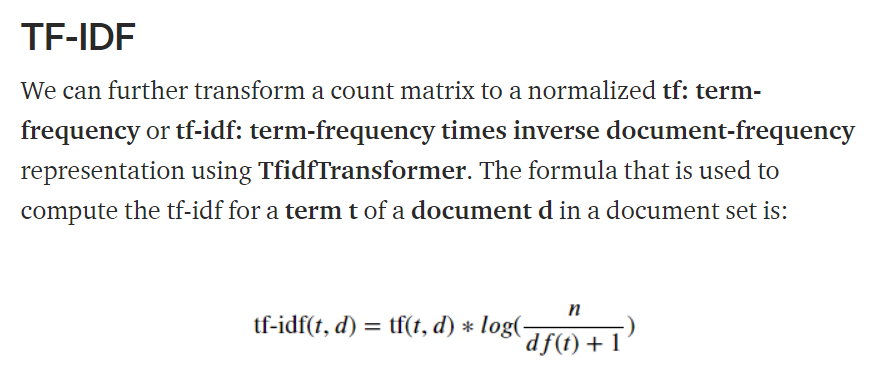

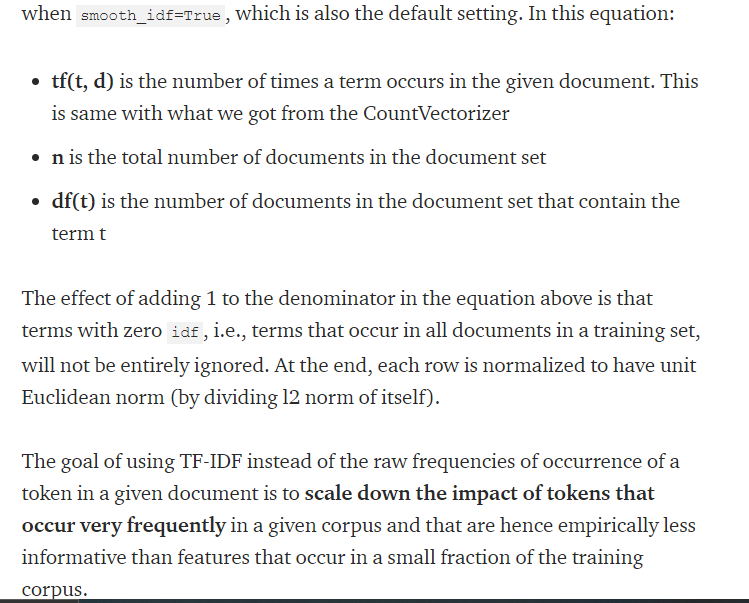

**TfidfTransformer v.s. Tfidfvectorizer**


Both TfidfTransformer and Tfidfvectorizer modules can convert a collection of raw documents to a matrix of TF-IDF features. However,

1. With Tfidftransformer you will systematically compute word counts using CountVectorizer and then compute the Inverse Document Frequency (IDF) values and only then compute the TF-IDF scores.
2. With Tfidfvectorizer on the contrary, you will do all three steps at once. Under the hood, it computes the word counts, IDF values, and TF-IDF scores all using the same data set.

 Tfidftransformer 

In [ ]:
from sklearn.feature_extraction.text import (CountVectorizer, 
                                             TfidfVectorizer,
                                             TfidfTransformer)
vectorizer = CountVectorizer(analyzer='word', 
                              token_pattern=r'\b[a-zA-Z]{3,}\b',  
                              ngram_range=(1, 1) 
                              )  
count_vectorized = vectorizer.fit_transform(X_train)
tfidf = TfidfTransformer(smooth_idf=True, use_idf=True)
train_features = tfidf.fit_transform(count_vectorized).toarray()

pd.DataFrame(train_features, 
             index=['sentence '+str(i) 
                    for i in range(1, 1+len(X_train))],
             columns=vectorizer.get_feature_names())

Tfidfvectorizer

In [ ]:
# Convert a collection of text documents to a matrix of token counts
tfidf = feature_extraction.text.TfidfVectorizer(encoding='utf-8',
                       ngram_range=(1,1),
                       max_features=5000,
                       norm='l2',
                       sublinear_tf=True)

In [ ]:
train_features = tfidf.fit_transform(X_train).toarray()

In [ ]:
print(train_features[1])
print(train_features.shape)

In [ ]:
pd.DataFrame(train_features, 
             index=['sentence '+str(i) 
                    for i in range(1, 1+len(X_train))],
             columns=tfidf.get_feature_names())

In [ ]:
dic_vocabulary = tfidf.vocabulary_

In order to know the position of a certain word, we can look it up in the vocabulary:

In [ ]:
word = "forest"
dic_vocabulary[word]
#If the word exists in the vocabulary, 
#this command prints a number N, 
#meaning that the Nth feature of the matrix is that word.

In [ ]:
test_features = tfidf.transform(X_test).toarray()
print(test_features.shape)

In [ ]:
train_labels = Y_train
test_labels = Y_test

<a id="5.1"></a>
<font color="blue" size=+2.5><b> reduce the matrix dimensionality </b></font>

 in order to reduce the dimensionality of our matrix ! [Feature matrix shape: Number of documents x Length of vocabulary ] we can carry out some Feature Selection, the process of selecting a subset of relevant variables. I will proceed as follows:

treat each category as binary (for example, the “Tech” category is 1 for the Tech news and 0 for the others);
perform a Chi-Square test to determine whether a feature and the (binary) target are independent;
keep only the features with a certain p-value from the Chi-Square test.

In [ ]:
"""from sklearn import feature_selection 
y = data_clean['target']
X_names = tfidf.get_feature_names()
p_value_limit = 0.95
dtf_features = pd.DataFrame()
for cat in np.unique(y):
    chi2, p = feature_selection.chi2(X_train, y==cat)
    dtf_features = dtf_features.append(pd.DataFrame(
                   {"feature":X_names, "score":1-p, "y":cat}))
    dtf_features = dtf_features.sort_values(["y","score"], 
                    ascending=[True,False])
    dtf_features = dtf_features[dtf_features["score"]>p_value_limit]
X_names = dtf_features["feature"].unique().tolist()
len(X_names)"""

<a id="5.0"></a>
<h2 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home"> <center>  Model training </center></h2>

<a id="5.2"></a>
<font color="blue" size=+2.5><b> Model : Multinomial NB </b></font>

In [ ]:
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
mnb_classifier = MultinomialNB()

In [ ]:
mnb_classifier.fit(train_features,train_labels)

In [ ]:
mnb_prediction = mnb_classifier.predict(test_features)

# Visualizing scikit model performance

In [ ]:
training_accuracy = accuracy_score(train_labels, mnb_classifier.predict(train_features))
print(training_accuracy)

In [ ]:
testing_accuracy = accuracy_score(test_labels, mnb_prediction)
print(testing_accuracy)

In [ ]:
print(classification_report(test_labels, mnb_prediction))

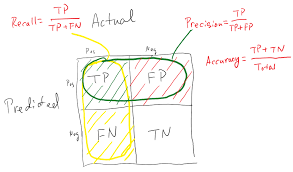

In [ ]:
conf_matrix = confusion_matrix(test_labels, mnb_prediction)
print(conf_matrix)

In [ ]:
import seaborn as sns
sns.heatmap(conf_matrix/np.sum(conf_matrix),annot=True, fmt='.2%', cmap='Blues')

In [ ]:
#from sklearn.neighbors import KNeighborsClassifier
#knn = KNeighborsClassifier().fit(train_features, train_labels)

In [ ]:
#predicts = knn.predict((test_features))
#print(classification_report(test_labels, predicts)) 

# Fitting the Test data for submission

In [ ]:
test_vectorizer =tfidf.transform( data_clean_test['text_clean']).toarray()

In [ ]:
test_vectorizer.shape

In [ ]:
final_predictions = mnb_classifier.predict(test_vectorizer)

In [ ]:
final_predictions

In [ ]:
submission_df = pd.DataFrame()

In [ ]:
submission_df['id'] = data_clean_test['id']
submission_df['target'] = final_predictions

In [ ]:
submission_df

In [ ]:
submission_df['target'].value_counts()

In [ ]:
submission = submission_df.to_csv('Result.csv',index = False)


<font size='5' color='red'>  if you liked this kernel,please upvote it <3 </font>
    



<font size='5' color='Black'> WORK IN PROGRESS ...</font>